In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.test.is_built_with_cuda()

False

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [7]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
def plotsample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index])

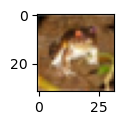

In [9]:
plotsample(0)

In [10]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [11]:
y_train[0]

array([6], dtype=uint8)

In [12]:
classes[y_train[0][0]]

'frog'

In [13]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [14]:
x_train_scaled[0][0]

array([[0.23137255, 0.24313725, 0.24705882],
       [0.16862745, 0.18039216, 0.17647059],
       [0.19607843, 0.18823529, 0.16862745],
       [0.26666667, 0.21176471, 0.16470588],
       [0.38431373, 0.28627451, 0.20392157],
       [0.46666667, 0.35686275, 0.24705882],
       [0.54509804, 0.41960784, 0.29411765],
       [0.56862745, 0.43137255, 0.31372549],
       [0.58431373, 0.45882353, 0.34901961],
       [0.58431373, 0.47058824, 0.36470588],
       [0.51372549, 0.40392157, 0.30196078],
       [0.49019608, 0.38823529, 0.29803922],
       [0.55686275, 0.45098039, 0.35686275],
       [0.56470588, 0.43921569, 0.3372549 ],
       [0.5372549 , 0.41176471, 0.30980392],
       [0.50588235, 0.38039216, 0.27843137],
       [0.5372549 , 0.41568627, 0.30980392],
       [0.5254902 , 0.41568627, 0.29803922],
       [0.48627451, 0.38039216, 0.25098039],
       [0.54509804, 0.44313725, 0.30588235],
       [0.54509804, 0.43921569, 0.29411765],
       [0.52156863, 0.41176471, 0.27058824],
       [0.

In [15]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [16]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)

In [17]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
32*32*3

3072

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
model.fit(x_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50


1563/1563 [==============================] - 52s 33ms/step - loss: 1.8097 - accuracy: 0.3543
Epoch 2/50
1563/1563 [==============================] - 54s 35ms/step - loss: 1.6171 - accuracy: 0.4300
Epoch 3/50
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5383 - accuracy: 0.4567
Epoch 4/50
1563/1563 [==============================] - 54s 35ms/step - loss: 1.4786 - accuracy: 0.4792
Epoch 5/50
1563/1563 [==============================] - 54s 35ms/step - loss: 1.4296 - accuracy: 0.4976
Epoch 6/50
1563/1563 [==============================] - 51s 33ms/step - loss: 1.3851 - accuracy: 0.5147
Epoch 7/50
1563/1563 [==============================] - 51s 33ms/step - loss: 1.3467 - accuracy: 0.5250
Epoch 8/50
1563/1563 [==============================] - 52s 33ms/step - loss: 1.3111 - accuracy: 0.5393
Epoch 9/50
1563/1563 [==============================] - 51s 33ms/step - loss: 1.2815 - accuracy: 0.5521
Epoch 10/50
1563/1563 [==============================] - 55s 3

In [25]:
classes[np.argmax(model.predict(x_test_scaled)[0])]

313/313 [==============================] - 2s 5ms/step


'cat'

In [26]:
classes[y_test[0][0]]

'cat'

In [27]:
def get_model():
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')])

    model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
    
    return model

In [29]:
    %%timeit -n1 -r1 
    with tf.device('/CPU:0'):
        cpu_model = get_model()
        cpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 51s 32ms/step - loss: 1.8143 - accuracy: 0.3540
52.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
